<a href="https://colab.research.google.com/github/laurynasjs/machine_learning_foundations/blob/main/FINAL_Week_3_Building_SOTA_Supervised_Learning_Models_QUESTIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> DUPLICATE THIS COLAB TO START WORKING ON IT. Using File > Save a copy to drive.

# Week 3: Building State-of-the-art Supervised Learning Models

In this project, we will be building more advanced supervised learning models to solve Kaggle challenges, where you can compare your models to a community leader board. Unlike previous weeks, this assignment will be more open-ended and provide you more opportunity to try new and creative approaches to building better performing models. This is representative of the research cycle, where you can put some of the things you have learned so far to practice. Use discussion with your peers and the teaching staff to help guide your thinking. Remember to always frame your work in terms of build-measure-learn thinking so you can be clear on what you're trying and why. 


### Instructions

1. We provide starter code and a selection of Kaggle datasets below as a scaffold. Although a lot of the assignment is open-ended, you should constrain yourself to one of the dataset options below and models within scikit-learn (at first). 
1. Ensure you read through the document and starting code before beginning your work. Understand the overall structure and goals of the project to make your iteration smoother.
1. This project is open-ended due to the many possible ways to improve performance. We leave it to you to choose when your project practice is "enough", and whether you want to pursue advanced, optional techniques to improve performance. We encourage you to share progress on Slack to calibrate your solutions with others as you work. 
1. As you work, try to practice hypothesis-driven _build-measure-learn_ development loops. Open ended ML modeling projects are especially helped by thinking clearly about the state of your ML experiments so far and what to try next.

# Dependencies

We first setup the libraries requires for the project. Many of these may already be installed by default in Colab.

In [2]:
!pip install numpy
!pip install scikit-learn
!pip install xgboost
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image  # image loading library
import librosa  # speech library for loading
import xgboost as xgb  # gradient boosting library
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Choose a dataset and build a SOTA ML model

Your assignment is to pick your favorite dataset, and use a combination of the modeling and featurization techniques introduced here to build the best model you can. In each dataset, we have fixed the training and test set. You may only use the training set for fitting models and hyperparameter tuning. Using data augmentation techniques based on the data we've provided is okay, but for "official" results don't add more training data of your own. Please avoid fitting your hyperparameters too much using the test set. Instead, create a small dev set of your own from the training set and use the test set infrequently.

Refer to course pages and previous projects for strategies to explore in improving your results. Remember to always work in build-measure-learn hypothesis-led iterations. 

At the end, you should provide your best model(s) and results, and prepare to review/discuss what you tried with classmates.

## Datasets

We present 4 different options of Kaggle datasets, one for each of the modalities above. **You should pick your favorite one and build a model for that dataset.** Because this project emphasizes achieving SOTA performance, see how far you can go in improving performance on just a single task. (Of course if you achieve good performance and run out of ideas for how to improve, it's okay to work on multiple datasets in this project).

For each dataset, we have downloaded and formatted the data for you. We provide a brief description below and the link to the original Kaggle competition where you can find forum discussion and example notebooks for inspiration. These datasets can get quite large, and Colab has limited RAM and storage. We recommend you read through the descriptions below and the Kaggle pages but only pick one to download.

Some additional reminders:
- You may have to handle missing data. 
- You may want to create dev sets for hyperparameter tuning. 
- You are free to remove and add additional features. 
- The data will be given to you as Pandas Dataframes. You may need to convert these to NumPy arrays for your model training.
- We don't have access to the true test labels for many Kaggle labels and so we partition the training set into our own test set.

**NOTE: You should just pick one problem out of the 4 for your project**

If you're in doubt start with the Transaction Fraud or Disaster prediction problems. 

In [4]:
# shared setup code for datasets
from sklearn.model_selection import train_test_split


class BaseDataset:
  """
  We will use this base class for all datasets.
  You do not need to change this class.
  """
  def __init__(self):
    self._data = self.make_data()

  def _load(self):
    raise NotImplementedError

  def make_data(self):
    print('loading data...')
    X_train, y_train = self._load()
    X_train, X_test, y_train, y_test = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42, shuffle=True)
    print('done.')
    return dict(X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test)

  def get_train_data(self):
    return self._data['X_train'], self._data['y_train']

  def get_test_data(self):
    return self._data['X_test'], self._data['y_test']

  @property
  def num_train(self):
    return len(self._data['X_train'])

  @property
  def num_test(self):
    return len(self._data['X_test'])


### Transaction Fraud Detection

[Kaggle link](https://www.kaggle.com/c/ieee-fraud-detection/overview) 

This dataset contains Vesta's real world e-commerce transactions with features from device type to product types. The challenge is to design a model to classify fraudulent transactions, helping businesses reduce loss.

**Transaction Features:**

- `TransactionDT`: timedelta from a given reference datetime (not an actual timestamp)
- `TransactionAMT`: transaction payment amount in USD
- `ProductCD`: product code, the product for each transaction
- `card1` - `card6`: payment card information, such as card type, card category, issue bank, country, etc.
- `addr`: address
- `dist`: distance
- `P_` and (`R__`) `emaildomain`: purchaser and recipient email domain
- `C1`-`C14`: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
- `D1`-`D15`: timedelta, such as days between previous transaction, etc.
- `M1`-`M9`: match, such as names on card and address, etc.
- `Vxxx`: Vesta engineered rich features, including ranking, counting, and other entity relations.

**Identity Features:**

Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
They're collected by Vesta’s fraud protection system and digital security partners.
(The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)


The following are categorical features:
`ProductCD`, `card1` - `card6`, `addr1`, `addr2`, `P_emaildomain`, `R_emaildomain`, `M1` - `M9`, `DeviceType`, `DeviceInfo`, `id_12` - `id_38`. We recommend you handle categorical features by converting them to [one-hot representations](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/). 

Further, this dataset may have missing entries, as is common in tabular data. You have many options here: you can drop rows with missing data, or replace with a filler value, or try to impute it with similar values. It is up to you!

In [1]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=11_y7TCGE3YRL_qW33XVVWUILlrrkzcSZ' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=11_y7TCGE3YRL_qW33XVVWUILlrrkzcSZ" -O train_transaction.csv && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1c1u1zKKVz6FnbcMUM6yUzrigqfK6bQn2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1c1u1zKKVz6FnbcMUM6yUzrigqfK6bQn2" -O train_identity.csv && rm -rf /tmp/cookies.txt

--2022-09-30 07:27:52--  https://docs.google.com/uc?export=download&confirm=t&id=11_y7TCGE3YRL_qW33XVVWUILlrrkzcSZ
Resolving docs.google.com (docs.google.com)... 173.194.218.113, 173.194.218.102, 173.194.218.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.218.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-44-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1458rpols4dpjpdhi6q6d48aan7i0n1t/1664522850000/17643477956629335341/*/11_y7TCGE3YRL_qW33XVVWUILlrrkzcSZ?e=download&uuid=47e8b8c3-ad86-4853-8732-cc18c8b98ef4 [following]
--2022-09-30 07:27:52--  https://doc-0k-44-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1458rpols4dpjpdhi6q6d48aan7i0n1t/1664522850000/17643477956629335341/*/11_y7TCGE3YRL_qW33XVVWUILlrrkzcSZ?e=download&uuid=47e8b8c3-ad86-4853-8732-cc18c8b98ef4
Resolving doc-0k-44-docs.googleusercontent.com (doc-0k-44-docs.googleusercontent.com)... 74.125.134.1

In [5]:
import numpy as np
import pandas as pd

class FraudDataset(BaseDataset):
  
  def _load(self):
    rs = np.random.RandomState(42)

    train_tx = pd.read_csv('./train_transaction.csv')
    train_id = pd.read_csv('./train_identity.csv')
    train_data = train_tx.merge(train_id, on='TransactionID', how='left')
    train_data.reset_index(inplace=True)
    del train_data['TransactionID']
    train_label = train_data['isFraud']
    del train_data['isFraud']
    
    # subsample 10k positive and negative!
    indices0 = rs.choice(np.where(train_label == 0)[0], 10000, replace=False)
    indices1 = rs.choice(np.where(train_label == 1)[0], 10000, replace=False)
    indices = np.concatenate([indices0, indices1])
    train_data = train_data.iloc[indices]
    train_label = train_label.iloc[indices]
    
    return train_data, train_label


dataset = FraudDataset()

loading data...
done.


In [116]:
X_train, y_train = dataset.get_train_data()
X_test, y_test = dataset.get_test_data()
print('Raw Input:')
print(X_train.head())
print('Targets:')
print(y_train.head())

Raw Input:
        TransactionDT  TransactionAmt ProductCD  card1  card2  card3  \
100677        2040188           25.00         H  16485  174.0  150.0   
48739         1171969           21.00         W   5033  269.0  150.0   
317134        7907020          107.95         W   9485  111.0  150.0   
335997        8275057          141.00         W   6530  206.0  150.0   
196248        4410075          117.00         W   3574  232.0  150.0   

             card4  card5  card6  addr1  ...        id_31  id_32  id_33  \
100677        visa  226.0  debit  264.0  ...  chrome 63.0   24.0    NaN   
48739   mastercard  224.0  debit  123.0  ...          NaN    NaN    NaN   
317134        visa  226.0  debit  315.0  ...          NaN    NaN    NaN   
335997  mastercard  126.0  debit  330.0  ...          NaN    NaN    NaN   
196248        visa  166.0  debit  272.0  ...          NaN    NaN    NaN   

                 id_34 id_35  id_36  id_37  id_38  DeviceType  DeviceInfo  
100677  match_status:2     T 

In [7]:
X_train.shape, X_test.shape

((16000, 433), (4000, 433))

In [8]:
X_train.dtypes

index               int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card1               int64
                   ...   
id_36              object
id_37              object
id_38              object
DeviceType         object
DeviceInfo         object
Length: 433, dtype: object

<BarContainer object of 100 artists>

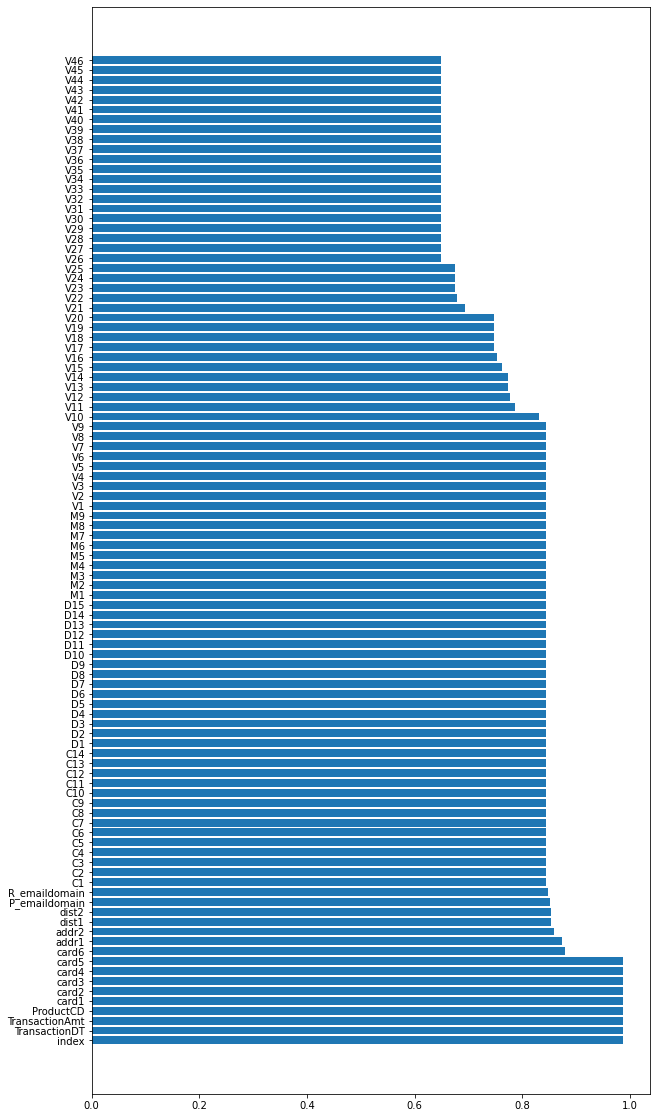

In [ ]:
fig = plt.figure(figsize=(10, 20))
plt.barh(X_train.columns[:100], (X_train.isnull().sum()/len(X_train)).sort_values(ascending=False)[:100])

In [ ]:
X_train.nunique().sort_values(ascending=False)

index            16000
TransactionDT    15984
id_02             6115
V307              3796
V127              2889
                 ...  
V14                  2
M5                   2
id_27                1
V1                   1
V305                 1
Length: 433, dtype: int64

In [ ]:
X_train.head()

,index,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
100677,100677,2040188,25.00,H,16485,174.0,150.0,visa,226.0,debit,...,chrome 63.0,24.0,NaN,match_status:2,T,F,T,T,desktop,Windows
48739,48739,1171969,21.00,W,5033,269.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
317134,317134,7907020,107.95,W,9485,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335997,335997,8275057,141.00,W,6530,206.0,150.0,mastercard,126.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196248,196248,4410075,117.00,W,3574,232.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X_train[X_train.select_dtypes(['float']).columns]

,TransactionAmt,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
100677,25.000,174.0,150.0,226.0,264.0,87.0,NaN,NaN,1.0,1.0,...,166.0,NaN,454.0,214.0,NaN,NaN,NaN,NaN,NaN,24.0
48739,21.000,269.0,150.0,224.0,123.0,87.0,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
317134,107.950,111.0,150.0,226.0,315.0,87.0,6.0,NaN,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335997,141.000,206.0,150.0,126.0,330.0,87.0,2.0,NaN,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196248,117.000,232.0,150.0,166.0,272.0,87.0,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188942,100.000,529.0,150.0,162.0,325.0,87.0,NaN,NaN,1.0,1.0,...,166.0,13.0,390.0,549.0,NaN,NaN,NaN,NaN,NaN,24.0
381901,994.000,327.0,150.0,102.0,251.0,87.0,636.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498684,42.950,360.0,150.0,166.0,264.0,87.0,0.0,NaN,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367631,57.950,174.0,150.0,226.0,315.0,87.0,5.0,NaN,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X_train[X_train.select_dtypes(['float']).columns].nunique().sort_values(ascending=False)

id_02             6115
V307              3796
V127              2889
TransactionAmt    2617
V308              2585
                  ... 
V41                  2
V28                  2
V240                 2
V1                   1
V305                 1
Length: 399, dtype: int64

In [ ]:
X_train[X_train.select_dtypes(['object']).columns].nunique().sort_values(ascending=False)

DeviceInfo       454
id_31            101
id_33             73
id_30             65
P_emaildomain     54
R_emaildomain     45
ProductCD          5
card4              4
id_15              3
id_34              3
id_23              3
M4                 3
M2                 2
DeviceType         2
id_38              2
id_37              2
id_36              2
id_35              2
card6              2
M1                 2
M3                 2
id_29              2
id_16              2
id_12              2
M9                 2
M8                 2
M7                 2
M6                 2
M5                 2
id_28              2
id_27              1
dtype: int64

In [10]:
X_train[X_train.select_dtypes(['object']).columns].isnull().sum()/len(X_train)

ProductCD        0.000000
card4            0.002063
card6            0.002063
P_emaildomain    0.148500
R_emaildomain    0.615812
M1               0.571187
M2               0.571187
M3               0.571187
M4               0.364312
M5               0.611125
M6               0.427500
M7               0.673937
M8               0.673875
M9               0.673875
id_12            0.609625
id_15            0.615000
id_16            0.649125
id_23            0.985812
id_27            0.985812
id_28            0.615062
id_29            0.615062
id_30            0.852500
id_31            0.616750
id_33            0.857875
id_34            0.851125
id_35            0.615000
id_36            0.615000
id_37            0.615000
id_38            0.615000
DeviceType       0.615375
DeviceInfo       0.693375
dtype: float64

In [ ]:
X_train.select_dtypes(['object']).columns

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')

In [23]:
X_train.columns[X_train.columns.str.contains("add")]

Index(['addr1', 'addr2'], dtype='object')

In [30]:
X_train[["addr1", "addr2"]].describe()

,addr1,addr2
count,12133.000000,12133.000000
mean,291.730322,86.606280
std,102.937914,3.736611
min,110.000000,10.000000
25%,204.000000,87.000000
50%,299.000000,87.000000
75%,330.000000,87.000000
max,540.000000,96.000000


In [38]:
v_mask = X_train.columns.str.startswith("V")
X_train[X_train.columns[v_mask]].dtypes

V1      float64
V2      float64
V3      float64
V4      float64
V5      float64
         ...   
V335    float64
V336    float64
V337    float64
V338    float64
V339    float64
Length: 339, dtype: object

In [46]:
(X_train[X_train.columns[v_mask]].nunique().sort_values(ascending=False)>10).sum()

227

In [53]:
categorical_col = \
    ["ProductCD", "addr1", "addr2", "P_emaildomain", "R_emaildomain"] + \
    ["card" + str(i) for i in range(1,7)] + \
    ["M" + str(i) for i in range(1,10)] + \
    ["DeviceType", "DeviceInfo"] + \
    ["id_" + str(i) for i in range(12,39)]

In [56]:
X_train[categorical_col]

,ProductCD,addr1,addr2,P_emaildomain,R_emaildomain,card1,card2,card3,card4,card5,...,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38
100677,H,264.0,87.0,yahoo.com,gmail.com,16485,174.0,150.0,visa,226.0,...,NotFound,Windows 10,chrome 63.0,24.0,NaN,match_status:2,T,F,T,T
48739,W,123.0,87.0,NaN,NaN,5033,269.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
317134,W,315.0,87.0,yahoo.com,NaN,9485,111.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335997,W,330.0,87.0,yahoo.com,NaN,6530,206.0,150.0,mastercard,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196248,W,272.0,87.0,NaN,NaN,3574,232.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188942,H,325.0,87.0,gmail.com,gmail.com,14643,529.0,150.0,visa,162.0,...,NotFound,Windows 7,firefox 57.0,24.0,1920x1080,match_status:2,T,F,T,T
381901,W,251.0,87.0,yahoo.com,NaN,2616,327.0,150.0,discover,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498684,W,264.0,87.0,hotmail.com,NaN,1939,360.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367631,W,315.0,87.0,anonymous.com,NaN,6170,174.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
X_train[categorical_col].nunique()

ProductCD           5
addr1              92
addr2              17
P_emaildomain      54
R_emaildomain      45
card1            2648
card2             454
card3              52
card4               4
card5              54
card6               2
M1                  2
M2                  2
M3                  2
M4                  3
M5                  2
M6                  2
M7                  2
M8                  2
M9                  2
DeviceType          2
DeviceInfo        454
id_12               2
id_13              34
id_14              17
id_15               3
id_16               2
id_17              41
id_18              12
id_19             209
id_20             135
id_21              56
id_22               5
id_23               3
id_24               8
id_25              55
id_26              30
id_27               1
id_28               2
id_29               2
id_30              65
id_31             101
id_32               4
id_33              73
id_34               3
id_35     

In [74]:
categorical_col

['ProductCD',
 'addr1',
 'addr2',
 'P_emaildomain',
 'R_emaildomain',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'DeviceType',
 'DeviceInfo',
 'id_12',
 'id_13',
 'id_14',
 'id_15',
 'id_16',
 'id_17',
 'id_18',
 'id_19',
 'id_20',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_32',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38']

In [92]:
X_train["ProductCD"]

100677    H
48739     W
317134    W
335997    W
196248    W
         ..
188942    H
381901    W
498684    W
367631    W
183256    C
Name: ProductCD, Length: 16000, dtype: object

In [87]:
categorical_col = \
    ["ProductCD", "addr1", "addr2", "P_emaildomain", "R_emaildomain"] + \
    ["card" + str(i) for i in range(1,7)] + \
    ["M" + str(i) for i in range(1,10)] + \
    ["DeviceType", "DeviceInfo"] + \
    ["id_" + str(i) for i in range(12,39)]

numerical_col = list(set(X_train.columns) - set(categorical_col))

In [117]:
# Label Encoding
for col in categorical_col:
  encoder = preprocessing.OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-9999)
  encoder.fit(X_train[col].values.reshape(-1, 1))
  X_train[col] = encoder.transform(X_train[col].values.reshape(-1, 1))
  X_test[col] = encoder.transform(X_test[col].values.reshape(-1, 1))

In [118]:
X_train = X_train.fillna(-9999)
X_test = X_test.fillna(-9999)

In [119]:
X_train[categorical_col].dtypes

ProductCD        float64
addr1            float64
addr2            float64
P_emaildomain    float64
R_emaildomain    float64
card1            float64
card2            float64
card3            float64
card4            float64
card5            float64
card6            float64
M1               float64
M2               float64
M3               float64
M4               float64
M5               float64
M6               float64
M7               float64
M8               float64
M9               float64
DeviceType       float64
DeviceInfo       float64
id_12            float64
id_13            float64
id_14            float64
id_15            float64
id_16            float64
id_17            float64
id_18            float64
id_19            float64
id_20            float64
id_21            float64
id_22            float64
id_23            float64
id_24            float64
id_25            float64
id_26            float64
id_27            float64
id_28            float64
id_29            float64


In [141]:
xgb.XGBClassifier.fit

<function xgboost.sklearn.XGBClassifier.fit(self, X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None, sample_weight_eval_set=None, callbacks=None)>

In [158]:
?xgb.train

In [187]:
#############################
#### YOUR CODE GOES HERE ####
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing


# X_train.drop("index", inplace=True)
# X_test.drop("index", inplace=True)

# model = xgb.XGBClassifier()

# Encoding
for col in categorical_col:
  encoder = preprocessing.OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-9999)
  encoder.fit(X_train[col].values.reshape(-1, 1))
  X_train[col] = encoder.transform(X_train[col].values.reshape(-1, 1))
  X_test[col] = encoder.transform(X_test[col].values.reshape(-1, 1))

X_train = X_train.fillna(-9999)
X_test = X_test.fillna(-9999)

seed = 7
test_size = 0.33
xtrain, xvalid, ytrain, yvalid = train_test_split(X_train, y_train, test_size=test_size, random_state=seed)

dtrain = xgb.DMatrix(xtrain, label=ytrain)
dtest = xgb.DMatrix(xvalid, label=yvalid)

watchlist = [(dtest, 'eval'), (dtrain, 'train')]
# eval_set = [(xtrain, ytrain), (xvalid, yvalid)]
evals_result = {}

param = {
    'max_depth': 24, 
    'eta': 0.3, 
    'n_estimators': 150,
    'max_features': 'sqrt',
    'min_samples_split': 5,
    'min_samples_leaf': 6,
    # 'bootstrap': bootstrap,
    'gamma': 10,
    'objective': 'binary:logistic',
    'eval_metric': 'auc'
    }

bst = xgb.train(
    param,
    dtrain,
    evals=watchlist, 
    evals_result=evals_result, 
    # enable_categorical=True, 
    # use_label_encoder=False,
    # eval_metric=["auc"], 
    # eval_set=eval_set,
    early_stopping_rounds=50,
    num_boost_round=200,
    )

#############################

[0]	eval-auc:0.85767	train-auc:0.890096
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 50 rounds.
[1]	eval-auc:0.872043	train-auc:0.908494
[2]	eval-auc:0.878504	train-auc:0.914499
[3]	eval-auc:0.885174	train-auc:0.921866
[4]	eval-auc:0.888576	train-auc:0.925955
[5]	eval-auc:0.890504	train-auc:0.92877
[6]	eval-auc:0.893577	train-auc:0.933051
[7]	eval-auc:0.895762	train-auc:0.93691
[8]	eval-auc:0.89745	train-auc:0.940015
[9]	eval-auc:0.899387	train-auc:0.942559
[10]	eval-auc:0.900939	train-auc:0.944838
[11]	eval-auc:0.902493	train-auc:0.947146
[12]	eval-auc:0.904077	train-auc:0.948441
[13]	eval-auc:0.904294	train-auc:0.949444
[14]	eval-auc:0.905694	train-auc:0.951744
[15]	eval-auc:0.906147	train-auc:0.953352
[16]	eval-auc:0.906983	train-auc:0.954883
[17]	eval-auc:0.907601	train-auc:0.955658
[18]	eval-auc:0.907567	train-auc:0.955741
[19]	eval-auc:0.90837	train-auc:0.958967
[20]	eval-auc:0.908958	train-auc

In [190]:
n_estimators = [int(x) for x in np.linspace(start = 150, stop = 300, num = 5)] # Number of trees in random forest
max_features = ['sqrt'] # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 20, num = 5)] # Maximum number of levels in tree
max_depth.append(4)
min_samples_split = [2, 5, 8] # Minimum number of samples required to split a node
min_samples_leaf = [2, 4, 6, 10] # Minimum number of samples required at each leaf node
# bootstrap = [True, False] # Method of selecting samples for training each tree

params_random_search = {
    'learning_rate': np.arange(0.1, 0.2, 0.6),
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'gamma': [0, 5, 10],
}

In [194]:
import sklearn

In [195]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [196]:
clf = xgb.XGBClassifier(objective= "binary:logistic")

rf_random = RandomizedSearchCV(estimator = clf, param_distributions = params_random_search, n_iter = 5, cv = 2, random_state=4, n_jobs = -1, scoring='roc_auc')

# Fit the random search model
rf_random.fit(X_train, y_train) 

RandomizedSearchCV(cv=2, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'gamma': [0, 5, 10],
                                        'learning_rate': array([0.1]),
                                        'max_depth': [10, 12, 15, 17, 20, 4],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [2, 4, 6, 10],
                                        'min_samples_split': [2, 5, 8],
                                        'n_estimators': [150, 187, 225, 262,
                                                         300]},
                   random_state=4, scoring='roc_auc')

In [204]:
dir(rf_random)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_

In [198]:
print("Randomize Search Cross Validation")
print("Best parameters found: ", rf_random.best_params_)
print("Best score: ", np.sqrt(np.abs(rf_random.best_score_)))

Randomize Search Cross Validation
Best parameters found:  {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 0}
Best score:  0.9585471233697346


In [202]:
best_params = {
    'n_estimators': 300,
    'min_samples_split': 5,
    'min_samples_leaf': 10,
    'max_features': 'sqrt',
    'max_depth': 15,
    'learning_rate': 0.1,
    'gamma': 0,
    'objective': 'binary:logistic',
    'eval_metric': 'auc'
 }

In [203]:
d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

bst = xgb.train(
    best_params,
    d_train,
    evals=[(d_test, 'eval'), (d_train, 'train')], 
    evals_result=evals_result, 
    # enable_categorical=True, 
    # use_label_encoder=False,
    # eval_metric=["auc"], 
    # eval_set=eval_set,
    early_stopping_rounds=50,
    num_boost_round=300,
    )

[0]	eval-auc:0.853655	train-auc:0.935112
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 50 rounds.
[1]	eval-auc:0.86787	train-auc:0.944781
[2]	eval-auc:0.873623	train-auc:0.952952
[3]	eval-auc:0.879341	train-auc:0.961138
[4]	eval-auc:0.883201	train-auc:0.964103
[5]	eval-auc:0.88573	train-auc:0.966737
[6]	eval-auc:0.888802	train-auc:0.970289
[7]	eval-auc:0.889667	train-auc:0.973936
[8]	eval-auc:0.892275	train-auc:0.976619
[9]	eval-auc:0.892856	train-auc:0.97911
[10]	eval-auc:0.893959	train-auc:0.981002
[11]	eval-auc:0.895578	train-auc:0.982974
[12]	eval-auc:0.89801	train-auc:0.984886
[13]	eval-auc:0.900269	train-auc:0.986966
[14]	eval-auc:0.900907	train-auc:0.988434
[15]	eval-auc:0.901905	train-auc:0.989504
[16]	eval-auc:0.903203	train-auc:0.990901
[17]	eval-auc:0.90463	train-auc:0.991855
[18]	eval-auc:0.905069	train-auc:0.992646
[19]	eval-auc:0.90636	train-auc:0.993426
[20]	eval-auc:0.907184	train-auc:

KeyboardInterrupt: ignored

In [205]:
y_pred = rf_random.predict(X_test)
predictions = [round(value) for value in y_pred]

In [210]:
from sklearn.metrics import roc_auc_score, accuracy_score
predictions = rf_random.predict_proba(X_test)[:, 1]
# evaluate predictions
print ('ROC AUC Score',roc_auc_score(y_test, predictions))

ROC AUC Score 0.9353855435453051


In [212]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.65%


### Disaster Prediction from Tweets

[Kaggle link](https://www.kaggle.com/c/nlp-getting-started/overview)

Tweets are an important communication channel in times of emergency. Ideally, our protection agencies can programmatically monitor Twitter to detect disasters and provide relief. However, Tweets that may sound that it is reporting a disaster may be referring to something else entirely.

This dataset contains a collection of tweet texts annotated with binary labels that indicate whether the tweet describes a real disaster or not. Additional features, such as location and keyword may be provided.

Data Columns:
- id - a unique identifier for each tweet
- text - the text of the tweet
- location - the location the tweet was sent from (may be blank)
- keyword - a particular keyword from the tweet (may be blank)
- target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

To get started, we recommend ignoring the keyword and location data initially, and focus on featurizing the tweet itself. Once you have a baseline model, you can try adding the keyword and location as additional features to see if they improve performance.
Further, this dataset may have missing entries. You have many options here: you can drop rows with missing data, drop features with missing labels, or replace with a filler value, or try to impute it with similar values. It is up to you!

Raw text is not easily fed into a model. We recommend exploring different methods to featurize the dataset. Try it out!

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1NfuR0tuBF0t5HJW2Q12l0c0hnAH1VqTj' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1NfuR0tuBF0t5HJW2Q12l0c0hnAH1VqTj" -O train.csv && rm -rf /tmp/cookies.txt

--2022-04-06 06:36:48--  https://docs.google.com/uc?export=download&confirm=&id=1NfuR0tuBF0t5HJW2Q12l0c0hnAH1VqTj
Resolving docs.google.com (docs.google.com)... 74.125.197.101, 74.125.197.102, 74.125.197.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.197.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-44-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/o56rch1857oebr6pc2bvk3ccubrlh94p/1649226975000/17643477956629335341/*/1NfuR0tuBF0t5HJW2Q12l0c0hnAH1VqTj?e=download [following]
--2022-04-06 06:36:49--  https://doc-0c-44-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/o56rch1857oebr6pc2bvk3ccubrlh94p/1649226975000/17643477956629335341/*/1NfuR0tuBF0t5HJW2Q12l0c0hnAH1VqTj?e=download
Resolving doc-0c-44-docs.googleusercontent.com (doc-0c-44-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to doc-0c-44-docs.googleusercontent.com (doc-0c-44-

In [ ]:
import pandas as pd

class TweetDataset(BaseDataset):
  
  def _load(self):
    train_data = pd.read_csv('./train.csv')
    train_label = train_data['target']
    del train_data['id'], train_data['target']
    return train_data, train_label


dataset = TweetDataset()

loading data...
done.


In [ ]:
X_train, y_train = dataset.get_train_data()
print('Raw Input:')
print(X_train.head())
print('Targets:')
print(y_train.head())

Raw Input:
       keyword            location  \
4996  military               Texas   
3263  engulfed                 NaN   
4907  massacre  Cottonwood Arizona   
2855   drought         Spokane, WA   
4716      lava     Medan,Indonesia   

                                                   text  
4996  Courageous and honest analysis of need to use ...  
3263  @ZachZaidman @670TheScore wld b a shame if tha...  
4907  Tell @BarackObama to rescind medals of 'honor'...  
2855  Worried about how the CA drought might affect ...  
4716  @YoungHeroesID Lava Blast &amp; Power Red #Pan...  
Targets:
4996    1
3263    0
4907    1
2855    1
4716    0
Name: target, dtype: int64


In [ ]:
#############################
#### YOUR CODE GOES HERE ####


#############################

### Google Home Command Classification

[Kaggle link](https://www.kaggle.com/c/tensorflow-speech-recognition-challenge/overview)

Google Home, and similar smart devices, rely on speech models to detect when the user utters commands, like "Hey Google". This dataset contains 65,000 one-second long utterances of 30 different short words, each uttered by thousands of people. The challenge is to build an algorithm to classify spoken commands. 

Below we download a file called `train.7z`. It contains a few informational files and a folder of audio files. The audio folder contains subfolders with 1 second clips of voice commands, with the folder name being the label of the audio clip. The labels you will need to predict are `yes`, `no`, `up`, `down`, `left`, `right`, `on`, `off`, `stop`, `go`. You should ignore all other classes. Unlike the Kaggle challenge, here, you do not need to worry about auxiliary labels and background noise. That being said, you will not be able to directly compare your results to the Kaggle leaderboard given these differences.

We recommend featurizing the audio clips as a first step. Consider computing log mel spectrograms as we did above. 


In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1sfkLsKT8JHPMM1pifQJqefL5elopjFX7' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1sfkLsKT8JHPMM1pifQJqefL5elopjFX7" -O train.7z && rm -rf /tmp/cookies.txt
!7z x train.7z

--2022-04-06 06:36:50--  https://docs.google.com/uc?export=download&confirm=t&id=1sfkLsKT8JHPMM1pifQJqefL5elopjFX7
Resolving docs.google.com (docs.google.com)... 74.125.197.138, 74.125.197.100, 74.125.197.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.197.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-44-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pedm429esq2arr063ub1en74lselrjv7/1649226975000/17643477956629335341/*/1sfkLsKT8JHPMM1pifQJqefL5elopjFX7?e=download [following]
--2022-04-06 06:36:50--  https://doc-14-44-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pedm429esq2arr063ub1en74lselrjv7/1649226975000/17643477956629335341/*/1sfkLsKT8JHPMM1pifQJqefL5elopjFX7?e=download
Resolving doc-14-44-docs.googleusercontent.com (doc-14-44-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to doc-14-44-docs.googleusercontent.com (doc-14-44

In [ ]:
import os
import librosa
from glob import glob
import pandas as pd

class CommandDataset(BaseDataset):
  _commands = ['yes', 'no', 'up', 'down', 'left', 'right', 
               'on', 'off', 'stop', 'go']
  _sample_rate = 16000
  
  def _load(self):
    # Returns NumPy arrays, not dataframes.
    data, labels = [], []
    max_length = 0
    for c, command in enumerate(self._commands):
      files = glob(os.path.join(f'./train/audio/{command}/*.wav'))
      data_c = [librosa.load(f, sr=self._sample_rate)[0] for f in files]
      labels_c = [c] * len(data_c)
      max_length_c = max(len(row) for row in data_c)
      data += data_c
      labels += labels_c
      if max_length_c > max_length:
        max_length = max_length_c
    
    data = [  # pad to max length with 0s if < 16000 frames
      np.pad(row, (0, max_length - len(row)), 
             'constant', constant_values=(0, 0))
      for row in data]
    data = np.array(data)
    labels = np.array(labels)

    return data, labels

dataset = CommandDataset()

In [ ]:
X_train, y_train = dataset.get_train_data()
print('Raw Input:')
print(X_train[:5])
print('Targets:')
print(y_train[:5])

Raw Input:
       keyword            location  \
4996  military               Texas   
3263  engulfed                 NaN   
4907  massacre  Cottonwood Arizona   
2855   drought         Spokane, WA   
4716      lava     Medan,Indonesia   

                                                   text  
4996  Courageous and honest analysis of need to use ...  
3263  @ZachZaidman @670TheScore wld b a shame if tha...  
4907  Tell @BarackObama to rescind medals of 'honor'...  
2855  Worried about how the CA drought might affect ...  
4716  @YoungHeroesID Lava Blast &amp; Power Red #Pan...  
Targets:
4996    1
3263    0
4907    1
2855    1
4716    0
Name: target, dtype: int64


In [ ]:
#############################
#### YOUR CODE GOES HERE ####


#############################

### Classifying Cats and Dogs

[Kaggle link](https://www.kaggle.com/c/dogs-vs-cats)

Is this an image of a cat or a dog? This training dataset contains 25,000 images of both animals. These are real world images of pets with different camera angles, backgrounds, and quality. In other words, this is a difficult task! The top performing model scores 98.9% but use more sophisticated methods than shown in this notebook. Still, see how well you can do!

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ya_pBnNQ72Rw9AG0-6sZNRnt2ds_mBfP' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1ya_pBnNQ72Rw9AG0-6sZNRnt2ds_mBfP" -O train.zip && rm -rf /tmp/cookies.txt
!unzip -q train.zip

--2022-04-06 06:39:00--  https://docs.google.com/uc?export=download&confirm=t&id=1ya_pBnNQ72Rw9AG0-6sZNRnt2ds_mBfP
Resolving docs.google.com (docs.google.com)... 172.253.117.100, 172.253.117.102, 172.253.117.139, ...
Connecting to docs.google.com (docs.google.com)|172.253.117.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-44-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qtqroob0sln8f4p5s7thcsvef89rk4t5/1649227125000/17643477956629335341/*/1ya_pBnNQ72Rw9AG0-6sZNRnt2ds_mBfP?e=download [following]
--2022-04-06 06:39:00--  https://doc-00-44-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qtqroob0sln8f4p5s7thcsvef89rk4t5/1649227125000/17643477956629335341/*/1ya_pBnNQ72Rw9AG0-6sZNRnt2ds_mBfP?e=download
Resolving doc-00-44-docs.googleusercontent.com (doc-00-44-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to doc-00-44-docs.googleusercontent.com (doc-0

In [ ]:
from glob import glob
cat_files = glob('train/cat.*.jpg')
dog_files = glob('train/dog.*.jpg')
print(f'{len(cat_files)} cat photos')
print(f'{len(dog_files)} dog photos')

12500 cat photos
12500 dog photos


In [ ]:
import os
import torch
import pandas as pd
from glob import glob
from tqdm import tqdm
from skimage.transform import resize
from skimage.io import imread
from skimage import color

def resize_pipeline(image, target_size):
  # find larger and smaller of height vs width
  shape = list(image.shape)
  larger_size = max(shape[:2])
  smaller_size = min(shape[:2])
  ratio = target_size / smaller_size 
  new_larger_size = int(larger_size * ratio)
  new_size = []
  for size in shape[:2]:
    if size == larger_size:
      new_size.append(new_larger_size)
    else:
      new_size.append(target_size)
  new_size.append(shape[2])
  image = resize(image, tuple(new_size), anti_aliasing=True)
  return image

def center_crop(image, target_size):
  shape = list(image.shape)
  y, x = shape[0], shape[1]
  startx = x //2-(target_size//2)
  starty = y //2-(target_size//2)    
  image = image[
    starty: starty + target_size, 
    startx: startx + target_size, 
    :
  ]
  return image

class CatDogDataset(BaseDataset):
  IMAGE_SIZE = 224

  def _load(self):
    cat_files = glob('train/cat.*.jpg')
    dog_files = glob('train/dog.*.jpg')
    img_files = cat_files + dog_files
    labels = [0] * len(cat_files) + [1] * len(dog_files)

    img_data = []
    pbar = tqdm(total=len(img_files), position=0, leave=True)
    for img_file in img_files:
      image = imread(img_file)
      image = resize_pipeline(image, 64)
      if image.shape[0] < 64 and  image.shape[1] < 64:
        # case 1: the image is already small in both width and height
        image_ = np.zeros((64, 64, 3))
        image_[:image.shape[0], :image.shape[1], :] = image
        image = image_
      elif image.shape[0] < 64:
        # case 2: the image is already small in width only
        image_ = np.zeros((64, image.shape[1], 3))
        image_[:image.shape[0], :, :] = image
        image = center_crop(image_, 64)
      elif image.shape[1] < 64:
        # case 3: the image is already small in height only
        image_ = np.zeros((image.shape[0], 64, 3))
        image_[:, :image.shape[1], :] = image
        image = center_crop(image_, 64)
      else:
        # case 2: the image is big and needs to be cropped
        image = center_crop(image, 64)
      image = image[np.newaxis, ...]  # n x h x w x c
      img_data.append(image)
      pbar.update()
    pbar.close()

    data = np.concatenate(img_data, axis=0)
    labels = np.array(labels)

    return data, labels


dataset = CatDogDataset()

loading data...


100%|██████████| 25000/25000 [14:56<00:00, 27.87it/s]


done.


In [ ]:
X_train, y_train = dataset.get_train_data()
print('Image shape:')
print(X_train[0].shape)
print('Image:')
print(X_train[0])
print('Label:')
print(y_train[0])

Image shape:
(64, 64, 3)
Image:
[[[0.3553699  0.4672404  0.53869485]
  [0.36470588 0.47594975 0.54930085]
  [0.39209559 0.50189951 0.5842637 ]
  ...
  [0.42064951 0.29368873 0.20594363]
  [0.40716912 0.26111582 0.13810724]
  [0.37940339 0.25339236 0.16106005]]

 [[0.36534376 0.47882966 0.56534376]
  [0.37832295 0.49136029 0.5776348 ]
  [0.40389404 0.51412066 0.60389404]
  ...
  [0.35680147 0.23167892 0.121875  ]
  [0.40162377 0.24560475 0.09375   ]
  [0.3689951  0.21213235 0.08351716]]

 [[0.40891544 0.52720588 0.62068015]
  [0.39543505 0.51308211 0.60719975]
  [0.39671679 0.51436385 0.61176471]
  ...
  [0.4182598  0.31237745 0.22873775]
  [0.39280025 0.25894608 0.14077819]
  [0.3967637  0.27234581 0.16400123]]

 ...

 [[0.82155738 0.82155738 0.77449855]
  [0.85438424 0.85174632 0.80732542]
  [0.87447917 0.8627451  0.82352941]
  ...
  [0.78817402 0.78033088 0.76464461]
  [0.6932598  0.69589772 0.67744787]
  [0.55332007 0.56939338 0.54717012]]

 [[0.82745098 0.82745098 0.78039216]
  [0.

In [ ]:
#############################
#### YOUR CODE GOES HERE ####


#############################

## Playground

The main project work for this week is to **achieve the best results you can on the dataset of your choice**! Use this as a chance to explore whatever aspect of ML model development you want to study. Remember to use our course materials and previous projects to outline good development practices, and specific algorithms/models/techniques to try. Always work in build-measure-learn iterations to guide your thinking. 


Your goal is to produce the best model you can on the test set. You may use model-centric and data-centric techniques to improve your modeling approach, training set, and fitting/tuning procedure. Part of the challenge of this assignment is how you will choose to navigate uncertainty and allocate your time to trying different approaches. We provide some scaffolding below for featurization, training, and evaluation. You are free to customize the starter code as you wish, just report results and communicate what you tried below. The teaching staff and your peers can help provide feedback as you work. 

### What did you try?

You are free to consult the internet. All of these datasets are taken from Kaggle and you may draw inspiration from the public solutions online, especially the winning ones. 
- What models did they use? 
- What features did they introduce?
- What was their development cycle like? 

Hint: often ML papers, talks, and blogs bias towards more complex methods because they are interesting to program and think about. In practice, it is often the simple things that make the most difference. As you work through this assignment, consider prioritizing simpler experiments (e.g. adding a nonlinear feature or tuning a hyperparameter) before you explore complex pipelines (e.g. boosting a bagged ensemble). Tools like data augmentation, removing outliers, or feature engineering often make a winning difference in ML competitions where everyone can fit models correctly on a given dataset.

**Keep track of your work**

As you try different techniques, visualize data/results, and try side experiments, keep track of your code and experiments! It's okay to let your work contain models that helped you learn but were replaced in later experiments. Keeping a _research journal_ as you work will help you refer back to what you've tried, what works, and where you can improve further later. Keep track of your work here in case you talk through it with peers or teaching staff.

In [ ]:
# GO FOR IT! 

### Preparing for results discussion

We don't do much in the way of formal grading, but you should prepare some experimental results, explanations of your experiments, and conclusions of your modeling work. Reporting what you tried and the outcomes you observed is a central part of quality ML engineering -- and it's critical for building successful ML systems when collaboration is involved. Here's some results and answers you should have ready when discussing your project:
* What are some baseline methods and their performance on this task?
* What modeling improvements did you try? How did each modeling improvement affect results (show a full results table if you can)
* What is your best result? What combination of modeling/data tricks produced this result?
* Did you perform any ablation or sensitivity experiments to understand which aspects of your best system are most important?
* Error analysis: Have you visualized where your model makes mistakes? (Either in aggregate or with individual mistaken examples)
* What is your current diagnosis of the ML System? Is it high variance/bias? What are your thoughts on current dataset size relative to model capacity / fit?
* What might you try next to improve on this task? Could you improve with more data? More time spent building larger models? Data augmentation or similar techniques? 
* Can you identify cases or types of inputs where the model is likely to make mistakes? Are there gaps in the training set and/or model assumptions which would lead the model to make mistakes or not have sufficient data in certain situations?